## Autoencoders

Autoencoders, bir unsupervised learning algoritmasıdır. Bu durumda belirli label'lar yoktur. Autoencoders, dimension reduction yani feature extraction amacıyla kullanılabilir. Denoising amacıyla da kullanılabilir.

Bir köpek resmi düşünün. Köpek resminin rengi, boyutu, kulağının uzunluğu gibi bir çok farklı feature'si vardır. Bir köpeği diğer hayvanlardan ayıran bir özelliğini düşünün. Köpeği diğer hayvanlardan ayıran bir özellik sesi olabilir. Autoencoders, bir input'taki en önemli feature'leri extract etmeye çalışıyor. Yani dimension reduction ve feature extraction amaçlarına özetle en az şekilde bilgi kaydetmek denilebilir.

Autoencoders ile amaçlanan, input Autoencoders modeline verilir ve output olarak input'un aynısı elde edilir. Yani input, output'a kopyalanır. Eğitilen Autoencoders, input'u output'a kopyalar. Amaç input'u output'a kopyalama işi yapılırken ortaya çıkan feature'leri kullanmaktır. Input, output'a %100 kopyalanıyorsa bunun anlamı güzel feature'ler elde edilmiştir. 

<br>
<img src="a1.png" style="width:600px;height:300px"/> 

Feature extraction işlemi şöyle yapılmaktadır: bir x resmi var. Input'larda da görüldüğü üzere x'ler var. x encoder'a verilmektedir. Encoder, compress input işlemine yarar. Compress input, input'u ifade edebileceğimiz en iyi feature'leri ortaya çıkarmak demektir. Bu işlemi aktivasyon fonksiyonları, hidden layer'lar ile yapıyor. Mesela f() fonksiyonu encoding yapan bir fonksiyon olsun. f(x) dediğimizde h=f(x) şeklinde h diye bir şey elde ediliyor. h=f(x) encoding function'dur. Şimdi de decoder işlemi yapılacaktır. Compress edilen input'u tekrardan çıkartıp uncompress yapacağız yani compress işleminin zıttı yapılacak. Decoding fonksiyonu g() olsun. h decoder'a giriyor ve r=g(h) şeklinde r sonucu elde ediliyor. Amaç h değerini elde edebilmektir yani feature'leri elde edebilmektir. x'i verdik h'ı elde ettik ve h'ı verdik r'ı elde ettik. Peki x ile r mıdır?: Bunu bulmak için min loss(x,r) ifadesi kullanılır. Bu ifadenin anlamları: x=r olmalıdır, x-r=0 olmalıdır, |x-r|^2=0 olmalıdır. Tüm loss'ların toplamı 0 olmak zorundadır. Bu loss'u machine learning'te mean square error (mse) tabirinden hatırlarsınız :)

x-r!=0 ise her zamanki gibi back propagation yapılacak ve weight'ler güncellenerek en doğru sonuç bulunmaya çalışılacaktır.

Back propagation tanımını hatırlayalım. Baxk propagation, weight'leri güncellemektir yani modelin train etmesi, öğrenmesi demektir. 

Model x ve r'ı birbirine eşitlemeye çalışıyor ve ona uygun weight'leri güncelliyor. Ve sonuç olarak faydalı feature'leri öğrenmiş oluyor.

Öğrenme işlemi için gerekli olan bir şart input_size < hidden_layer_size'dır. Aksi takdirde öğrenme gerçekleşemez, feature extract edilemez.

<font color="CadetBlue"><br>
DENOSING:

<br>
<img src="a2.png" style="width:600px;height:300px"/> 

Denosing, hatalardan temizleme anlamına gelmektedir.

Bir köpek resmi olsun. Bu resme bir noise verelim. Bu işlemin ardından yeni bir resim elde edilir. Corrupted image elde edilir. Corrupted image, orjinal köpek resmine noise eklenmesi sonucunda elde edilen resimdir. Sonra bunu input olarak autoencoder'e veriyoruz. Daha sonra elde edilen sonuçları orjinal resme veririz. Bu durumda sonuçlar orjinal resim olur. Böylelikle eklemiş olduğumuz noise öğrenilmiş oluyor ve corrupted image ile karşılaşıldığında denosing edilebilecek seviyeye erişiliyor.

<br>
<img src="a3.png" style="width:300px;height:200px"/> 

Yukarıda bir örnek görmekteyiz. Üst taraftaki grafikte bir sinüs dalgası bulunmaktadır. Bu grafiğe biraz noise ekleniyor ve aşağıdaki grafik elde ediliyor. Alttaki grafik input olarak veriliyor  ve output olarak üst taraftaki orjinal grafiğin çıkması bekleniyor. Böylece eklemiş olduğumuz noise öğreniliyor. Bu gerçek hayatta karşımıza çıktığında alt taraftaki grafiği autoencoder modeline veririz ve bu denosing işlemini yapar ve olması gereken sinyal ortaya çıkar.

Bu işlemin kullanımı hem resimlerin olduğu veri setlerinde hem de sinyal işlemede fayda sağlamaktadır.

In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

In [4]:
#fashion veri setini yükleyelim.
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


Unsupervised işlemi yapılacaktır dolayısıyla label'lara ihtiyaç yoktur. Input'ta output'ta train edilecek feature'ler olacaktır. Dolayısıyla y_train kullanılmayacağından (x_train, _) şeklinde _ ile ifade edebiliriz.

In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [6]:
x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

x_train ve x_test içerisinde 28x28 boyutunda 10000 tane resim vardır. Toplamda 70000 tane resim mevcuttur. Yukarıdaki kod bloğu ile 28x28 tek bir vektör haline getirilmiştir.

Şimdi veri seti içeriğine göz atalım.

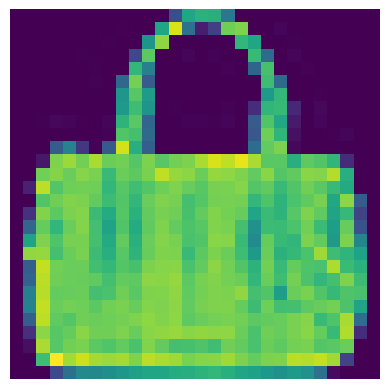

In [8]:
plt.imshow(x_train[4000].reshape(28,28)) 
#Görselleştirme işlemi için x_train'in 4000 indeksli resmini 28x28 boyutuna geri döndürdük.
plt.axis("off")
plt.show()

Yukarıdaki çıktıda görüldüğü üzere veri seti modaya dair olduğundan bir çanta resmi görülmektedir.

<br>
<img src="a4.png" style="width:300px;height:200px"/> 

Yukarıdaki görseli açıklayalım. Veri seti içerisinde 28x28 resimler vardır. Bu resimleri 784 satırdan 1 tane sütundan oluşan bir vektör haline getirdik. Bu vektör içerisinde fashion veri setindeki her bir resim bulunmaktadır.

Şimdi Autoencoder modeli oluşturalım. Bunun için bir input layer'a ihtiyaç vardır. Resmin boyutu 784 olduğu için input layer'ında 784 tane nöron vardır. Sonrasında 32 tane nörondan oluşan encoder layer oluşturulmuştur. Unutmayalım ki encoder layer, hidden layer'dır. Sonrasında 16 tane nörondan oluşan encoder layer oluşturulmuştur. Sonrasında 32 nörondan oluşan decoded layer oluşturulmuştur. Sonrasında 784 nörondan oluşan output layer oluşturulmuştur.

In [10]:
input_img = Input(shape = (784,))

encoded = Dense(32, activation="relu")(input_img)

encoded = Dense(16, activation="relu")(encoded)

decoded = Dense(32, activation="relu")(encoded)

decoded = Dense(784, activation="sigmoid")(decoded)

autoencoder = Model(input_img,decoded)


encoded = Dense(32, activation="relu")(input_img) satırında (input_img) kısmına bir önceki layer'ı yazarak katmanların birbirine bağlanmasını sağlamış oluyoruz.

Yukarıdaki kod bloğunda autoencoder = Model(input_img,decoded) satırına kadarki kısımlarda autoencoder'ı oluşturduğumuza göre bunu bir autoencoder değişkeninde depolamalıyız ve bu satırda da yapılan işlem budur. Parametrelerde input_img başlangıçtır ve decoded'te son layer'dır.

Bu işlemlerin görseli şu şekildedir:


<br>
<img src="a5.png" style="width:500px;height:300px"/> 

Bu aşamaya kadar autoencoder modeli oluşturulmuştur. Artık compile edebiliriz.

In [11]:
autoencoder.compile(optimizer="rmsprop",loss="binary_crossentropy")

In [12]:
hist = autoencoder.fit(x_train,
                       x_train,
                       epochs=200,
                       batch_size=256,
                       shuffle=True,
                       validation_data = (x_train,x_train))

Epoch 1/200
235/235 [==============================] - 8s 18ms/step - loss: 0.3991 - val_loss: 0.3462
Epoch 2/200
235/235 [==============================] - 4s 16ms/step - loss: 0.3348 - val_loss: 0.3260
Epoch 3/200
235/235 [==============================] - 3s 15ms/step - loss: 0.3231 - val_loss: 0.3214
Epoch 4/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3175 - val_loss: 0.3131
Epoch 5/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3138 - val_loss: 0.3112
Epoch 6/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3109 - val_loss: 0.3103
Epoch 7/200
235/235 [==============================] - 3s 13ms/step - loss: 0.3087 - val_loss: 0.3078
Epoch 8/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3069 - val_loss: 0.3072
Epoch 9/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3053 - val_loss: 0.3050
Epoch 10/200
235/235 [==============================] - 3s 14ms/step - loss: 0.303

235/235 [==============================] - 3s 13ms/step - loss: 0.2882 - val_loss: 0.2879
Epoch 81/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2881 - val_loss: 0.2881
Epoch 82/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2881 - val_loss: 0.2872
Epoch 83/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2880 - val_loss: 0.2883
Epoch 84/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2880 - val_loss: 0.2870
Epoch 85/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2880 - val_loss: 0.2889
Epoch 86/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2879 - val_loss: 0.2883
Epoch 87/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2879 - val_loss: 0.2891
Epoch 88/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2878 - val_loss: 0.2877
Epoch 89/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2878 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.2863 - val_loss: 0.2863
Epoch 160/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2863 - val_loss: 0.2861
Epoch 161/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2863 - val_loss: 0.2868
Epoch 162/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2863 - val_loss: 0.2863
Epoch 163/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2863 - val_loss: 0.2865
Epoch 164/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2863 - val_loss: 0.2874
Epoch 165/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2863 - val_loss: 0.2872
Epoch 166/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2863 - val_loss: 0.2863
Epoch 167/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2862 - val_loss: 0.2857
Epoch 168/200
235/235 [==============================] - 3s 12ms/step - loss: 

In [13]:
# save model
autoencoder.save_weights("autoencoder_model.h5")  #weight değerleri kaydedilmiştir.

In [14]:
#evaluation
print(hist.history.keys())

dict_keys(['loss', 'val_loss'])


Değerlendirme için elde edilen sonuçlar görselleştirilmelidir. Sonuçları modeli eğitirken hist isimli bir değişkene kaydetmiştik.

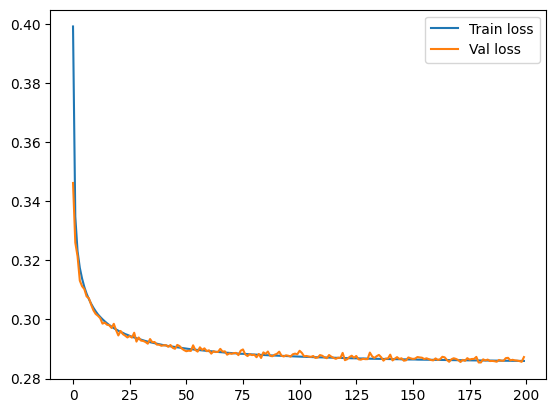

In [26]:
plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")
plt.legend()
plt.show()

In [27]:
# save history (hist)
with open("autoencoders_hist.json","w") as f:
    json.dump(hist.history,f)

In [28]:
# load history
with codecs.open("autoencoders_hist.json","r", encoding="utf-8")  as f:
    n = json.loads(f.read())

dict_keys(['loss', 'val_loss'])


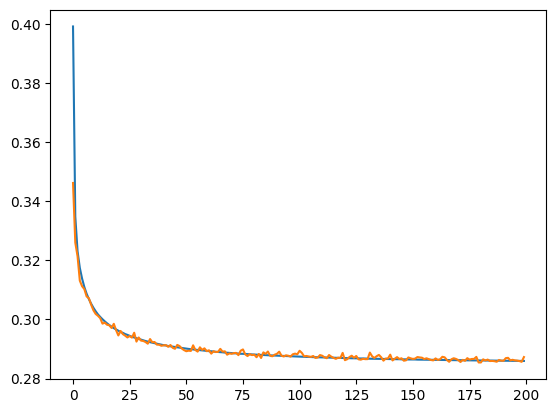

In [29]:
print(n.keys())
plt.plot(n["loss"],label = "Train loss")
plt.plot(n["val_loss"],label = "Val loss")

Autoencoder modeline gerçek bir fashion mnis veri setinden resim yollayacağız ve output layer'da neler gördüğümüzü test edeceğiz. Birde 2.hidden layer'da (2.encoder'da) elde ettiğimiz şeyi görselleştireceğiz ve sonuçları inceleyeceğiz. Önemli feature'leri inceleyeceğiz. Bunun için 2 tane modele ihtiyaç var. Birincisi encoder modelidir ve ikincisi de input'tan başlayıp 2.hidden layer'a kadar olan bölgeyi kapsayan modeldir. 

Şimdi encoder modelini oluşturalım.

In [30]:
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


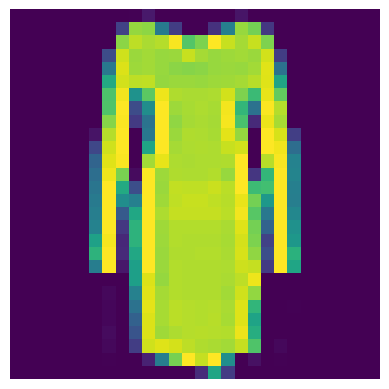

In [21]:
plt.imshow(x_test[1500].reshape(28,28))
plt.axis("off")
plt.show()

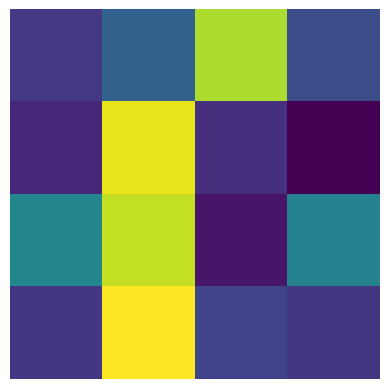

In [22]:
plt.figure()
plt.imshow(encoded_img[1500].reshape(4,4))
plt.axis("off")
plt.show()

2.hidden layer'ın sonucunda yukarıdaki çıktıda gördüğünüz görsel elde edilmektedir.

Şimdi baştan sonra bir input verelim ve output'ta elde edilenlere bakalım.

In [31]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


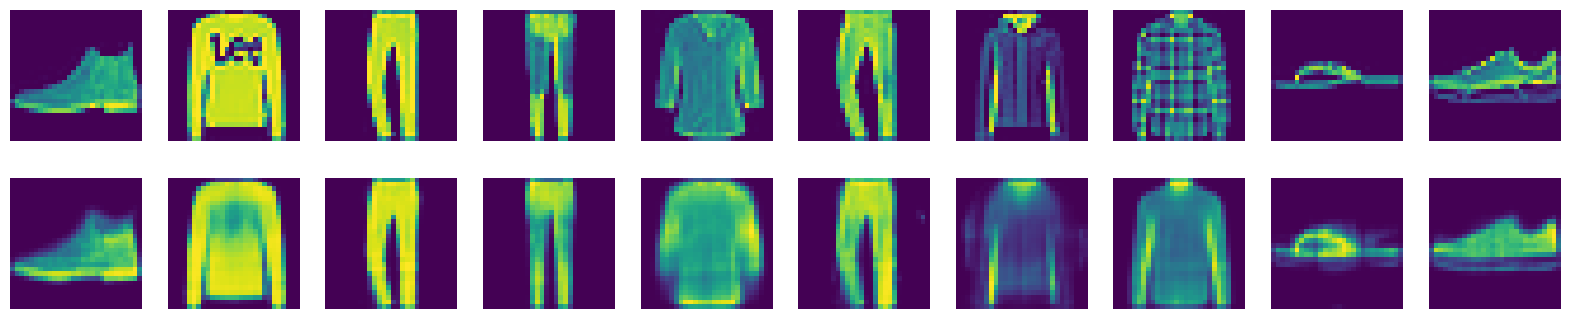

In [32]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis("off")
plt.show()

Çıktıyı inceleyelim. Üstteki resimler orjinal resimlerdir. Alttaki resimler de orjinal resimleri autoencoder'a verdikten sonra ortaya çıkan output'lardır. Görüldüğü üzere orjinal resimler ile output'taki resimler %100 aynı değildir. Ama şekiller büyük ölçüde autoencoder'in output'unda görülmektedir.